<a href="https://colab.research.google.com/github/bingxl/example/blob/master/deeplearn/2.KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN K-最近邻算法，在前K个最近样本中选择最近的占比最高的类别作为预测类别。
计算逻辑：
1. 给定测定对象，计算它与训练集中每个对象的距离；
2. 圈定距离最近的k个训练对象，作为测试对象的邻居；
3. 根据k个近邻对象所属的类别找到占比最高的哪个类别作为测试对象的测试类别；

准确度影响因素：距离的计算和K值的选择



In [0]:
%tensorflow_version 2.x
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import operator
from functools import reduce
%matplotlib inline

TensorFlow 2.x selected.


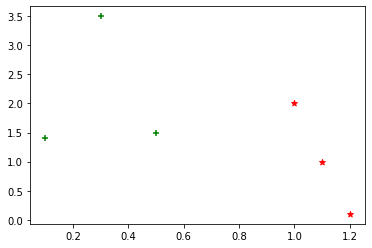

In [0]:
def createDataSet():
    group = np.array([[1.0,2.0],[1.2,0.1],[0.1,1.4],[0.3,3.5],[1.1,1.0],[0.5,1.5]])
    labels = np.array(['A','A','B','B','A','B'])
    return group, labels

group, labels = createDataSet()
plt.scatter(group[labels=='A', 0], group[labels=='A', 1], color='r', marker='*')
plt.scatter(group[labels=='B', 0], group[labels=='B', 1], color='g', marker='+')
plt.show()

In [0]:
def kNN_classify(k, dis, X_train, x_train, Y_test):
    assert dis == 'E' or dis == 'M', 'dis must E or M, E 欧式距离， M曼哈顿距离'
    num_test = Y_test.shape[0]
    
    labellist = []
    for i in range(num_test):
        distances = []
        # np.tile(y, (d1,d2)) 对y进行重复，（d1，d2）为对应维度上重复的次数        
        if dis == 'E':
            # 欧式距离
            distances = np.sqrt(np.sum(((X_train - np.tile(Y_test[i], (X_train.shape[0],1))) ** 2), axis=1))
        else:
            # 曼哈顿距离
            distances = np.sum(np.absolute(X_train - np.tile(Y_test[i], (X_train.shape[0],1))), axis=1)
        
        nearest_k = np.argsort(distances)
        topK = nearest_k[:k]
        classCount = {}
        for i in topK:
            classCount[x_train[i]] = classCount.get(x_train[i], 0) + 1
            pass
        sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
        labellist.append(sortedClassCount[0][0])
        pass
    return np.array(labellist)
    
 
            

In [0]:
y = np.array([[1.0, 2.1], [0.1, 2.0]])
print(kNN_classify(1, 'E', group, labels, y))
print(kNN_classify(1, 'M', group, labels, y))


['A' 'B']
['A' 'B']


In [0]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# print(kNN_classify(6, 'E', train_images, train_labels, test_images[:5]))
train_images = np.reshape(train_images, (train_images.shape[0], 28*28))
test_images = np.reshape(test_images, (test_images.shape[0], 28 * 28))

In [0]:
len(test_images)

10000

In [0]:
# 需要预测的数据集
test_index = 10000

y_pred = kNN_classify(6, 'E', train_images, train_labels, test_images[:test_index])

num_correct = np.sum(test_labels[:test_index] == y_pred)
accuracy = float(num_correct / test_index)
print("befor Normalization, accuracy is {0}".format(accuracy))

befor Normalization, accuracy is 0.2868


In [0]:
# 数据归一化， 将图片数据收缩到[0,1]之间
y_pred = kNN_classify(6, 'E', train_images/255, train_labels, test_images[:test_index]/255)
num_correct = np.sum(test_labels[:test_index] == y_pred)
accuracy = float(num_correct / test_index)
print("after Normalization, accuracy is {0}".format(accuracy))

after Normalization, accuracy is 0.9709


3


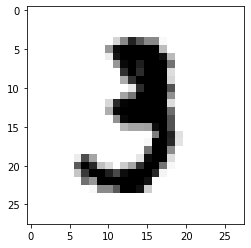

In [0]:
index = 50
print(train_labels[index])
plt.imshow(np.reshape(train_images[10], (28, 28)), cmap=plt.cm.binary)
plt.show()

In [0]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
# normalize
train_images = train_images / 255
test_images = test_images / 255

In [0]:
shape = reduce(lambda x,y: x*y, train_images[0].shape)
pre_index = 100
train_images = np.reshape(train_images, (len(train_images), shape))
train_labels = np.reshape(train_labels, len(train_labels))
test_labels = np.reshape(test_labels, len(test_labels))
test_images = np.reshape(test_images, (len(test_images), shape))

pre = kNN_classify(4, 'E', train_images, train_labels, test_images[:pre_index])

In [0]:
accuracy = np.sum(test_labels[:pre_index] == pre) / pre_index
print(accuracy)

0.34


In [0]:
# test_images[:pre_index].shape
np.reshape(train_labels, len(train_labels))


array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [0]:
a = (4,2,3)
reduce(lambda x,y: x*y, a)

24